Import packages

In [1]:
import keras
from keras import layers
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

Load data

In [2]:
img_height = 512
img_width = 512
data_dir = "data/Reference images"
batch_size = 20

images = []
for filename in os.listdir(data_dir):

    img = cv2.imread(os.path.join(data_dir,filename),cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)


Visualize the data

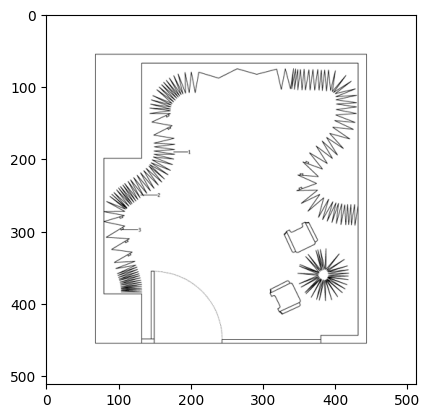

In [3]:
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))
plt.show()

Preprocess images

In [4]:
train_images = images[:int(len(images)*0.9)]
test_images = images[int(len(images)*0.9):]


train_images = np.array(train_images) / 255.
test_images = np.array(test_images) / 255.

train_images = np.reshape(train_images,(len(train_images), img_height, img_width, 1))
test_images.reshape(len(test_images), img_height, img_width, 1)



array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

Define the model

In [5]:
input_img = keras.Input(shape=(512, 512, 1))
# ----------------------- ENCODER —---------------
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# ----------------------- DECODER —---------------
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 512, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 512, 512, 256)     2560      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 256)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 128)     295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 128)    0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      73792 

Compile the model

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Fit the model

In [ ]:
autoencoder.fit(train_images, train_images, epochs=10)